In [1]:
import pandas as pd
#import plotly.graph_objs as go
import numpy as np
#from plotly.offline import plot, iplot, init_notebook_mode

#init_notebook_mode(connected=False)

In [2]:
#df_sim = pd.read_excel('C:\\Users\\Cristiane\\Documents\\UFMG\Arquivos_Dissertacao\Projeto\\notebooks\\df_sim_23_09.xlsx')
#df_sim = pd.read_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\data\\df_sim_SN_uma_lista.csv', sep=',')
#df_sim = pd.read_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\data\\df_sim_SN_09_11.csv',sep=',') 
df_sim = pd.read_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\data\\df_sim_relax_sn_22_03.csv',sep=',') 

df_sim=df_sim.drop_duplicates()

In [3]:
#df_dice = pd.read_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\data\\counterfactuals_geral.csv',sep=';') 


In [4]:
df_sim.Suicidio.value_counts()

0    3458
1    1533
Name: Suicidio, dtype: int64

In [5]:
df_sim

,Unnamed: 0,Id,Feature,Suicidio,Suicidio_new,Valor,Valor_new
0,0,2650,Droga,0,1.0,0.0,1.0
1,1,871,Capaz de desfrutar das coisas,0,1.0,2.0,1.0
2,2,485,Trabalho e interesses,0,1.0,2.0,1.0
3,3,3240,Capaz de tomar decisões importantes,0,1.0,1.0,2.0
4,4,1922,Capaz de tomar decisões importantes,1,2.0,2.0,3.0
...,...,...,...,...,...,...,...
4986,4986,2153,Capaz de desfrutar das coisas,0,1.0,2.0,4.0
4987,4987,511,Trabalho e interesses,0,2.0,3.0,1.0
4988,4988,1831,Hipocondriase,0,1.0,0.0,3.0
4989,4989,3853,Estudante,1,2.0,1.0,0.0


In [6]:
#geral baseline com 38 contrafact
#df_dice = pd.read_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\data\\counterfactuals_geral2.csv') 
#final = pd.read_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\data\\final_novo.csv',sep=';') 

In [7]:
#final.Suicidio.value_counts()
df_relax = pd.read_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\\data\df_relax.csv', sep=',')

In [8]:
df_relax

,Unnamed: 0,ID,Suicidio_CF,Suicidio_Original,feature_name,value_original,value_cf,valor_max,dif_target,dif_valor
0,0,1,1,0,Suic_familia,1,1.0,1.0,1,0.0
1,1,2,1,0,Suic_familia,1,1.0,1.0,1,0.0
2,2,4,1,0,Suic_familia,1,1.0,1.0,1,0.0
3,3,5,1,0,Suic_familia,1,1.0,1.0,1,0.0
4,4,6,1,0,Suic_familia,1,1.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...
29525,29525,3946,1,0,Droga,0,0.0,0.0,1,0.0
29526,29526,3947,1,0,Droga,0,0.0,0.0,1,0.0
29527,29527,3949,1,0,Droga,0,0.0,0.0,1,0.0
29528,29528,3951,1,0,Droga,0,0.0,0.0,1,0.0


In [9]:
df_sim['dif_target'] = df_sim.Suicidio_new-df_sim.Suicidio
df_sim['dif_valor'] = df_sim.Valor_new-df_sim.Valor

In [10]:
df_sim.loc[df_sim.dif_target > 0]

,Unnamed: 0,Id,Feature,Suicidio,Suicidio_new,Valor,Valor_new,dif_target,dif_valor
0,0,2650,Droga,0,1.0,0.0,1.0,1.0,1.0
1,1,871,Capaz de desfrutar das coisas,0,1.0,2.0,1.0,1.0,-1.0
2,2,485,Trabalho e interesses,0,1.0,2.0,1.0,1.0,-1.0
3,3,3240,Capaz de tomar decisões importantes,0,1.0,1.0,2.0,1.0,1.0
4,4,1922,Capaz de tomar decisões importantes,1,2.0,2.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
4986,4986,2153,Capaz de desfrutar das coisas,0,1.0,2.0,4.0,1.0,2.0
4987,4987,511,Trabalho e interesses,0,2.0,3.0,1.0,2.0,-2.0
4988,4988,1831,Hipocondriase,0,1.0,0.0,3.0,1.0,3.0
4989,4989,3853,Estudante,1,2.0,1.0,0.0,1.0,-1.0


In [11]:
#individuos que diminuiram o nível de ideação suicida
df_dif_target_diminuiu = df_sim.loc[(df_sim.dif_target < 0)]

In [12]:
#Se dif_target > 0 e dif_valor < 0, deu ruim
# se dif target e dif valor são maiores que 0 que dizer que aumentar o valor da feature aumenta ideação, então tá ok
df_dif_target_aumentou = df_sim.loc[(df_sim.dif_target > 0) & (df_sim.dif_valor < 0)]
df_dif_target_aumentou['valor_max']=df_dif_target_aumentou.groupby(['Id','Feature'])[['Valor_new']].transform('max')
df_val_max_aumentou=df_dif_target_aumentou[["Id", "Feature","valor_max"]].copy().drop_duplicates()

C:\Users\Cristiane\AppData\Local\Temp\ipykernel_22820\4061204132.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dif_target_aumentou['valor_max']=df_dif_target_aumentou.groupby(['Id','Feature'])[['Valor_new']].transform('max')


In [13]:
df_relax = df_relax.rename(columns={'ID':'Id'})

In [14]:
df_relax_dif_target_diminuiu = df_relax.loc[(df_relax.dif_target < 0)]

In [15]:
df_relax_dif_target_aumentou = df_sim.loc[(df_relax.dif_target > 0) & (df_relax.dif_valor < 0)]
#df_relax_dif_target_aumentou['valor_max']=df_relax_dif_target_aumentou.groupby(['Id','Feature'])[['Valor_new']].transform('max')
#df_relax_max_dif_target_aumentou=df_relax_dif_target_aumentou[["ID", "feature_name","valor_max"]].copy().drop_duplicates()

In [16]:
df_dif_target_diminuiu['Id'].nunique()

180

In [17]:
df_relax_dif_target_diminuiu['Id'].nunique()

14

In [18]:
df_teste_d = df_dif_target_diminuiu.merge(df_relax_dif_target_diminuiu,how='inner',on='Id')
df_teste_a = df_val_max_aumentou.merge(df_relax_dif_target_aumentou,how='inner',on='Id')

In [19]:
df_relax_dif_target_diminuiu['Id'] = df_relax_dif_target_diminuiu['Id'].astype(str) 
df_dif_target_diminuiu['Id'] = df_dif_target_diminuiu['Id'].astype(str)

C:\Users\Cristiane\AppData\Local\Temp\ipykernel_22820\2858315778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relax_dif_target_diminuiu['Id'] = df_relax_dif_target_diminuiu['Id'].astype(str)
C:\Users\Cristiane\AppData\Local\Temp\ipykernel_22820\2858315778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dif_target_diminuiu['Id'] = df_dif_target_diminuiu['Id'].astype(str)


In [20]:
#df_teste_l = df_dice_dif_target_diminuiu.merge(df_dif_target_diminuiu, how='left', on='Id')


Counts:
Reductions - Meu Modelo: 180
Reductions - Relax: 14
Increases - Meu Modelo: 1537
Increases - Relax: 1512


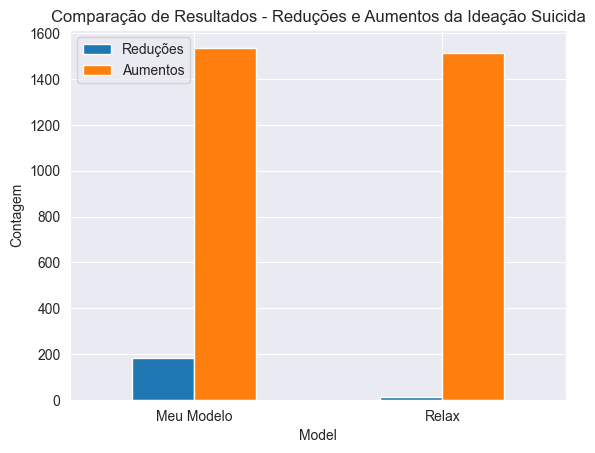

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar reduções no meu modelo
reducoes_meu_modelo = df_dif_target_diminuiu['Id'].nunique()  # Assumindo que 0 representa uma redução
# Contar reduções no modelo DiCE
reducoes_relax = df_relax_dif_target_diminuiu['Id'].nunique()  # Assumindo que 0 representa uma redução

# Contar aumentos no meu modelo
aumentos_meu_modelo = df_dif_target_aumentou['Id'].nunique()  # Assumindo que 1 representa um aumento
# Contar aumentos no modelo DiCE
aumentos_relax = df_relax_dif_target_aumentou['Id'].nunique()  # Assumindo que 1 representa um aumento

# Display the counts for verification
print("\nCounts:")
print(f"Reductions - Meu Modelo: {reducoes_meu_modelo}")
print(f"Reductions - Relax: {reducoes_relax}")
print(f"Increases - Meu Modelo: {aumentos_meu_modelo}")
print(f"Increases - Relax: {aumentos_relax}")

# Create a DataFrame for comparison
df_compare = pd.DataFrame({
    'Model': ['Meu Modelo', 'Relax'],
    'Reduções': [reducoes_meu_modelo, reducoes_relax],
    'Aumentos': [aumentos_meu_modelo, aumentos_relax],
})

# Plotting the bar chart
df_compare.plot(x='Model', kind='bar', stacked=False)
plt.title('Comparação de Resultados - Reduções e Aumentos da Ideação Suicida')
plt.ylabel('Contagem')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()
import seaborn as sns  # Mel-0---;

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar reduções no meu modelo
reducoes_meu_modelo = df_dif_target_diminuiu['Id'].nunique()  # Assumindo que 0 representa uma redução
# Contar reduções no modelo DiCE
reducoes_dice = df_dice_dif_target_diminuiu['Id'].nunique()  # Assumindo que 0 representa uma redução

# Contar aumentos no meu modelo
aumentos_meu_modelo = df_dif_target_aumentou['Id'].nunique()  # Assumindo que 1 representa um aumento
# Contar aumentos no modelo DiCE
aumentos_dice = df_dice_dif_target_aumentou['Id'].nunique()  # Assumindo que 1 representa um aumento

# Display the counts for verification
print("\nCounts:")
print(f"Reductions - Meu Modelo: {reducoes_meu_modelo}")
print(f"Reductions - DiCE: {reducoes_dice}")
print(f"Increases - Meu Modelo: {aumentos_meu_modelo}")
print(f"Increases - DiCE: {aumentos_dice}")

# Create a DataFrame for comparison
df_compare = pd.DataFrame({
    'Model': ['Meu Modelo', 'DiCE'],
    'Reduções': [reducoes_meu_modelo, reducoes_dice],
    'Aumentos': [aumentos_meu_modelo, aumentos_dice],
})

# Plotting the bar chart
df_compare.plot(x='Model', kind='bar', stacked=False)
plt.title('Comparação de Resultados - Reduções e Aumentos da Ideação Suicida')
plt.ylabel('Contagem')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

NameError: name 'df_dice_dif_target_diminuiu' is not defined

In [ ]:
import seaborn as sns  # Melhor visualização

# Comparação de resultados em um gráfico de barras
sns.barplot(data=df_compare.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title('Comparação de Resultados - Reduções e Aumentos da Ideação Suicida')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.legend(title='Tipo', labels=['Reduções', 'Aumentos'])
plt.show()

In [ ]:
# Gráfico de dispersão para mostrar contrafactuais
plt.scatter(df_dif_target_diminuiu['Id'], df_dif_target_diminuiu['Suicidio'], label='Modelo Meu', alpha=0.5)
plt.scatter(df_dice_dif_target_diminuiu['Id'], df_dice_dif_target_diminuiu['valor_max'], label='Modelo DiCE', alpha=0.5)
plt.title('Comparação dos Contrafactuais entre Modelos')
plt.xlabel('ID')
plt.ylabel('Ideação Suicida')
plt.legend()
plt.show()

In [ ]:
df_groups = df_dice_dif_target_diminuiu.groupby(['feature_name'])['valor_max'].count()

#create bar plot by group
df_groups.plot(kind='bar',title='Dice - Features que melhoraram a ideação suicida')

In [ ]:
df_dice_dif_target_aumentou.feature_name.value_counts()
df_groups = df_dice_dif_target_aumentou.groupby(['feature_name'])['valor_max'].count()

#create bar plot by group
df_groups.plot(kind='bar', title='Dice - Features que pioraram a ideação suicida')

In [ ]:
df_groups = df_val_max_diminuiu.groupby(['Feature'])['valor_max'].count()

#create bar plot by group
df_groups.plot(kind='bar',title='Features que melhoraram a ideação suicida')

In [ ]:
df_val_max_aumentou.Feature.value_counts()
df_groups = df_val_max_aumentou.groupby(['Feature'])['valor_max'].count()

#create bar plot by group
df_groups.plot(kind='bar', title='Features que pioraram a ideação suicida')

In [ ]:
df_teste = df_dif_target_aumentou.merge(df_dif_target_diminuiu,how='inner',on='Id')

In [ ]:
df_teste

In [ ]:
df_teste_t = df_teste_a.merge(df_teste_d,how='inner',on='Id')

In [ ]:
df_teste_t

In [ ]:
df_teste_a

In [ ]:
df_id_a = df_dif_target_aumentou.loc[(df_dif_target_aumentou.Id == 3952)]
df_id_a = df_id_a[['valor_max', 'Feature']]
df_id_a['valor_max'] = df_id_a['valor_max'] + 1

df_id_da = df_dice_dif_target_aumentou.loc[(df_dice_dif_target_aumentou.Id == 3952)]
df_id_da = df_id_da[['valor_max', 'feature_name']]
df_id_da['valor_max'] = df_id_da['valor_max'] + 1

In [ ]:
#azul piorou ideacao suicida e rosa melhorou 
Meu_modelo = go.Bar(x=df_id_a.Feature, y=df_id_a.valor_max, name="Meu modelo",marker=dict(
        color='rgb(160, 70, 80)'
               ))

Dice = go.Bar(x=df_id_da.feature_name, y=df_id_da.valor_max,name="Dice", marker=dict(
        color='rgb(34,163,192)'
               ))
data = [Meu_modelo,Dice]

layout = go.Layout(
    #autosize=True,
    width=50,
    height=200       
   # xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
    #yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
    #margin=go.layout.Margin(l=1, r=1, b=1, t=1, pad=2)#,
)
fig1 = go.Figure(data=dict(data=data), layout=layout)
#fig = dict(data=data)
fig1.update_layout(title_text="ID 3952 (aumentou)",autosize=False,
    width=600,
    height=600)
iplot(fig1, filename="size-margins")

In [ ]:
df_teste_d.Id.unique()

In [ ]:
df_id_d = df_dif_target_diminuiu.loc[(df_dif_target_diminuiu.Id == 3950)]
df_id_d = df_id_d[['valor_max', 'Feature']]
df_id_d['valor_max'] = df_id_d['valor_max'] + 1

df_id_dd = df_dice_dif_target_diminuiu.loc[(df_dice_dif_target_diminuiu.Id == 3950)]
df_id_dd = df_id_dd[['valor_max', 'feature_name']]
df_id_dd['valor_max'] = df_id_dd['valor_max'] + 1

In [ ]:
#azul piorou ideacao suicida e rosa melhorou 
Meu_modelo = go.Bar(x=df_id_d.Feature, y=df_id_d.valor_max, name="Meu modelo",marker=dict(
        color='rgb(160, 70, 80)'
               ))

Dice = go.Bar(x=df_id_dd.feature_name, y=df_id_dd.valor_max,name="Dice", marker=dict(
        color='rgb(34,163,192)'
               ))
data = [Meu_modelo,Dice]

layout = go.Layout(
    #autosize=True,
    width=50,
    height=200       
   # xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
    #yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
    #margin=go.layout.Margin(l=1, r=1, b=1, t=1, pad=2)#,
)
fig1 = go.Figure(data=dict(data=data), layout=layout)
#fig = dict(data=data)
fig1.update_layout(title_text="ID 3950 (diminuiu)",autosize=False,
    width=600,
    height=600)
iplot(fig1, filename="size-margins")

In [ ]:
df_id_a =df_dif_target_aumentou.loc[(df_dif_target_aumentou.Id == 2)]
df_id_a = df_id_a[['valor_max','Feature']]
df_id_a['valor_max']= df_id_a['valor_max'] + 1

df_id_ad =df_dice_dif_target_aumentou.loc[(df_dice_dif_target_aumentou.Id == 2)]
df_id_ad = df_id_ad[['valor_max','feature_name']]
df_id_ad['valor_max']= df_id_ad['valor_max'] + 1

In [ ]:
d=df_dif_target_diminuiu.loc[(df_dif_target_diminuiu.Id == 3)]
d[['Id','Feature','Suicidio','Suicidio_new']].drop_duplicates()#,'Valor','Valor_new']]

In [ ]:
df_id_a
#0 2 10 12

In [ ]:
df_id_a =df_dif_target_aumentou.loc[(df_dif_target_aumentou.Id == 14)]
df_id_a = df_id_a[['valor_max','Feature']]
df_id_a['valor_max']= df_id_a['valor_max'] + 1

df_id_d =df_dif_target_diminuiu.loc[(df_dif_target_diminuiu.Id == 14)]
df_id_d = df_id_d[['valor_max','Feature']]
df_id_d['valor_max']= df_id_d['valor_max'] + 1

In [ ]:
#azul piorou ideacao suicida e rosa melhorou 
melhorou = go.Bar(x=df_id_d.Feature, y=df_id_d.valor_max, name="melhorou",marker=dict(
        color='rgb(160, 70, 80)'
               ))

piorou = go.Bar(x=df_id_a.Feature, y=df_id_a.valor_max,name="piorou", marker=dict(
        color='rgb(34,163,192)'
               ))
data = [melhorou,piorou]

layout = go.Layout(
    #autosize=True,
    width=50,
    height=200       
   # xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
    #yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
    #margin=go.layout.Margin(l=1, r=1, b=1, t=1, pad=2)#,
)
fig1 = go.Figure(data=dict(data=data), layout=layout)
#fig = dict(data=data)
fig1.update_layout(title_text="ID 14",autosize=False,
    width=600,
    height=600)
iplot(fig1, filename="size-margins")

In [ ]:
#features que pioram a ideation
df_val_max.Feature.value_counts()

In [ ]:
df_groups = df_val_max.groupby(['Feature'])['valor_max'].count()

#create bar plot by group
df_groups.plot(kind='bar',title='Features que pioraram ideação suicida')

In [ ]:
df_sim.loc[(df_sim.dif_target < 0) & (df_sim.dif_valor > 0)]

In [ ]:
df_sim.loc[(df_sim.dif_target < 0) & (df_sim.dif_valor < 0)]

In [ ]:
df_dif_val = df_dif_target.loc[df_dif_target.dif_valor < 0]

In [ ]:
df_dif_val.Id.value_counts()

In [ ]:
df_sim.Id.value_counts()

In [ ]:
df_s_neg = df_sim.loc[df_sim.Suicidio < 2]

In [ ]:
df_s_pos = df_sim.loc[df_sim.Suicidio > 1]

In [ ]:
df_s_pos.Id.value_counts()#929

In [ ]:
df_s_neg['dif_n'] = df_s_neg.Suicidio_new-df_s_neg.Suicidio

In [ ]:
df_s_neg.Id.value_counts() #2653

In [ ]:
df_s_negat = df_s_neg.loc[df_s_neg.dif_n > 0]


In [ ]:
df_s_negat

In [ ]:
df_s_negat.Id.value_counts() #2571

In [ ]:
len(pd.unique(df_sim['Id']))

In [ ]:
df_sim

In [ ]:
len(pd.unique(df_nao['Id']))

In [ ]:
df_groups = df_sim.groupby(['Feature'])['Id'].count()

#create bar plot by group
df_groups.plot(kind='bar')

In [ ]:
df_sim['Feature'].value_counts().plot(kind='barh')


In [ ]:
df_groups = df_nao.groupby(['Feature'])['Id'].count()

#create bar plot by group
df_groups.plot(kind='bar')

In [ ]:
df_sim['qtd']=df_sim.groupby('Id')['Id'].transform('count')
df_nao['qtd']=df_nao.groupby('Id')['Id'].transform('count')

In [ ]:
df_1=df_sim.loc[df_sim['qtd']==1]

In [ ]:
df_1.Id.nunique()

In [ ]:
df_sim['qtd'].value_counts()

In [ ]:
df_groups = df_nao.groupby(['qtd'])['Id'].count()

#create bar plot by group
df_groups.plot(kind='bar')

In [ ]:
#quantidade de features que geraram modificação no target - 96% dos ids foram sensibilizados por pelo menos 1 feature
df_groups = df_sim.groupby(['qtd']).agg({"Id": pd.Series.nunique})
#create bar plot by group
#df_groups.plot(kind='bar')
import seaborn as sns
df_groups = df_groups.reset_index()
sns.barplot(x='qtd',
           y="Id",
           data=df_groups,errorbar="sd", palette="dark", alpha=.8, )

In [ ]:
df_groups = df_nao.groupby("qtd").agg({"Id": pd.Series.nunique})
#create bar plot by group
df_groups.plot(kind='bar')

In [ ]:
Suic_familia=df_sim.loc[df_sim['Feature']=='Suic_familia']

In [ ]:
Suic_familia.Suicidio_new.value_counts()

In [ ]:
Hipocondriase =df_sim.loc[df_sim['Feature']=='Hipocondriase']

In [ ]:
df_g = df_sim.groupby('Id').agg({'Feature': 'count'}).reset_index()

In [ ]:
df_h = Hipocondriase.groupby('Id').agg({'Valor_new': 'count'}).reset_index()

In [ ]:
df_h.Valor_new.value_counts()

In [ ]:
Sentimentos_culpa =df_sim.loc[df_sim['Feature']=='Sentimentos_culpa']
df_s = Sentimentos_culpa.groupby('Id').agg({'Valor_new': 'count'}).reset_index()
df_s.Valor_new.value_counts()

In [ ]:
Trabalho =df_sim.loc[df_sim['Feature']=='Trabalho e interesses']
df_t = Trabalho.groupby('Id').agg({'Valor_new': 'count'}).reset_index()
df_t.Valor_new.value_counts()

In [ ]:
Trabalho

In [ ]:
feat =df_sim.loc[df_sim['Feature']=='Capaz de desfrutar das coisas']
df_c = feat.groupby('Id').agg({'Valor_new': 'count'}).reset_index()
df_c.Valor_new.value_counts()

In [ ]:
feat =df_sim.loc[df_sim['Feature']=='Droga']
df_c = feat.groupby('Id').agg({'Valor_new': 'count'}).reset_index()
df_c.Valor_new.value_counts()

In [ ]:
df_sim.groupby(['Id', 'Feature']).agg({'Valor_new': 'count'}).reset_index()
#quantos individuos foram sensibilizados por todas as mudancas de valores de features

In [ ]:
df_s =df_sim.groupby(['Id', 'Feature']).agg({'Valor_new': 'count'}).reset_index()


In [ ]:
df_s2 =df_s.groupby(['Valor_new', 'Feature']).agg({'Id': 'count'}).reset_index()

In [ ]:
df_s.groupby(['Valor_new', 'Feature']).agg({'Id': 'count'}).reset_index()

In [ ]:
#quantos individuos foram sensibilizados por todas as mudancas de valores de features

In [ ]:
df_s.groupby(['Valor_new', 'Feature']).agg({'Id': 'count'}).reset_index()

In [ ]:
df_groups = df_s.groupby(['Feature'])['Valor_new'].count()

#create bar plot by group
df_groups.plot(kind='bar')

In [ ]:
#df_s.loc(['Valor_new'].groupby(['Valor_new', 'Feature']).agg({'Id': 'count'}).reset_index())

In [ ]:
df_sim.info()

In [ ]:
df_dice

In [ ]:
df_sim['difs']=abs(df_sim['Suicidio_new']-df_sim['Suicidio'])

In [ ]:
df_sim['difv']=abs(df_sim['Valor_new']-df_sim['Valor'])

In [ ]:
df_sim['raz']=df_sim['difs'] /df_sim['difv']

In [ ]:
df_sim['raz']

In [ ]:
df_final = df_sim[['Id','Feature','Valor_new']].copy().drop_duplicates()

In [ ]:
df_sim

In [ ]:
df_sim['raz'].value_counts()

In [ ]:
# quantos Ids cada feature sensibilizou
df_groups = df_final.groupby(['Feature'])['raz'].count()

#create bar plot by group
df_groups.plot(kind='bar')

In [ ]:
teste=df_final.loc[df_final['Id']==167]

In [ ]:
df_groups = teste.groupby(['Feature'])['Valor_new'].count()

#create bar plot by group
df_groups.plot(kind='bar',title='Id - 1972')

In [ ]:
df_final = df_sim[['Id','Feature','dif']].copy().drop_duplicates()

In [ ]:
df_final['dif'].value_counts()

In [ ]:
df_groups = df_final.groupby(['Feature'])['dif'].count()

#create bar plot by group
df_groups.plot(kind='bar')

In [ ]:
df_final.dif.hist()

In [ ]:
Trabalho =df_nao.loc[df_nao['Feature']=='Trabalho e interesses']

In [ ]:
Trabalho.Valor.isna().unique()

In [ ]:
Trabalho